# Mathematical fundamentals

This section of the appendix establishes some mathematical notation, and may serve as a brief refresher on fundamental concepts.

In [2]:
%run ../setup.ipynb

## Sets

A *set* is a basic concept in mathematics used to define collections of *elements*.
The [technical underpinnings of set theory](https://en.wikipedia.org/wiki/Set_(mathematics)) can get a bit tricky, but for our purposes, you can think of a set as any un-ordered collection.

Notationally, we use curly braces $\{\}$ to denote a set.  For example, we could have a set consisting of three colors defined as

$$
S = \{\text{red},\;\text{green},\;\text{blue}\}.
$$

Each of the three colors **red, green, blue** are *elements* of the set $S$.
Order is not important here: the the set above is equivalent to the set $\{\text{blue},\;\text{green},\;\text{red}\}$.
Repetition also does not matter: an element is either in the set or not.

We use the symbol $\in$ (a funny-looking *E*, denoting *element*) to denote membership in a set:

$$
\text{red} \in S,
$$

and $\notin$ to denote that an element does not belong to a set:

$$
\text{Cleveland} \notin S.
$$

We won't do too much with sets in this text, but the basic notation is helpful to have, especially when dealing with different types of numbers.

## Number systems

In digital signal processing, we use many kinds of numbers to represent different quantities.
It's helpful to have notation to specify exactly what kind of numbers we're talking about, so here's a brief list with their standard notations:

* $\mathbb{N}$, the *natural  numbers* (or *counting* numbers): $\{0, 1, 2, 3, \dots\}$
* $\mathbb{Z}$, the *integers*: $\{\dots, -3, -2, -1, 0, 1, 2, 3, \dots\}$
* $\mathbb{Q}$, the *rational numbers* (fractions): $\left\{\frac{n}{m} ~\middle|~ n,m \in \mathbb{Z}, m \neq 0\right\}$
* $\mathbb{R}$, the *real numbers* (i.e., the continuous number line)
* $\mathbb{C}$, the *complex numbers*: $\{a + \mathrm{j}b ~|~ a,b \in \mathbb{R}\}$

where $\mathrm{j} = \sqrt{-1}$ is the *imaginary unit* (we'll say more about that later in the appendix).

Natural numbers ($\mathbb{N}$) are often used for whole number quantities, such as sample positions $n$.
Real numbers ($\mathbb{R}$) are often used for continuous quantities, such as angles (in radians), frequencies (in cycles/sec), or time (in seconds).

Complex numbers occupy a special place in signal processing because they turn out to be a great tool for modeling periodic processes.  But more on that later.

## Sequences

A *sequence* is exactly what it sounds like: an ordered list of things.
Sequences are different from *sets* in that they are ordered, and repetition is allowed.

The most common usage of sequences in DSP is the sequence of sample values representing a digital signal.
This is commonly denoted by $x[n]$, where $n \in \mathbb{N}$ is the sample index, and $x[n]$ is the sampled value of the signal at the $n$th position.

## Summations

Throughout signal processing, we often need to add up long sequences of numbers. While we could easily express this using the standard $+$ notation, such as

$$
S = 1 + 2 + 3 + \dots + 100,
$$

this can get cumbersome and difficult to read, especially when the terms of the summation involve other calculations.

Instead, mathematicians express summations using the $\sum$ symbol, derived from the (capital) Greek letter *sigma* (equivalent to *S* in the latin alphabet, standing for *s*ummation).
The summation above would be equivalently expressed as

$$
\begin{align*}
S &= \sum_{n=1}^{100} n\\
&= 1 + 2 + 3 + \dots + 100.
\end{align*}
$$

The notation specifies the variable which is changing throughout the summation (in our case, $n$), and the start and end-points of the sum (1 to 100, inclusive) below and above the $\sum$ symbol.
Everything after the summation symbol describes what's being added up: in this case, just the values of $n$.

It's often helpful to think programmatically when reading summation expressions. 
The summation above would be translated to Python code as follows:
```python
S = 0

# Python ranges do not include the end point, so we need to go one past where we want to stop
for n in range(1, 101):
    S = S + n
```

## Modular arithmetic

Another common feature of mathematics of signal processing is the need to deal with repeating sequences and periodicity.
We use real numbers to model continuously repeating processes (like a point traveling continuously around a circle), but we also occasionally have **discrete** repeating processes, like the hours on a clock: 12:00, 1:00, 2:00, \dots, 11:00.
**Modular arithmetic** is the math of discrete repetition.

For a positive integer $N > 1$ (the *modulus*), we define for any integer $q \in \mathbb{Z}$
```{math}
q \mod N \in \{0, 1, \dots, N-1\}
```
to be the remainder of $q / N$.
Equivalently:
```{math}
q \mod N = k \quad\quad \text{such that } a \cdot N + k = q.
```
for non-negative integer $a \in \mathbb{N}$.

In Python code, this is implemented by
```python
# The % symbol
q % N

# Or the numpy function np.mod
np.mod(q, N)
```

### Examples

A few examples:

- $3 \mod 2 = 1$
- $-1 \mod 4 = 3$
- $20 \mod 5 = 0$
- $10 \mod 10 = 0$

## Exponentials

An exponential, generally speaking, is an expression of the form $c^x$ for some constant $c$, and should be read as "$c$ to the $x$th power".
Note that this is different from powers $x^n$, in that exponentials keep the base $c$ fixed and vary $x$, while powers do the opposite.

**Example**: $2^x \neq x^2$.

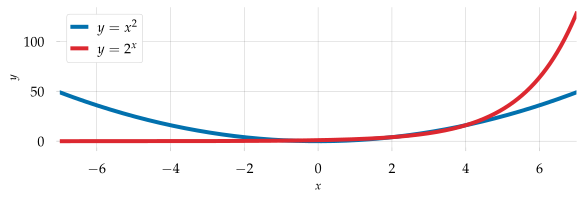

In [5]:
fig, ax = plt.subplots(figsize=figaspect(1./3))
x = np.linspace(-7, 7, num=1000)
ax.plot(x, x**2, label=r'$y=x^2$')
ax.plot(x, 2.0**x, label=r'$y=2^x$')
ax.legend(loc='upper left')
ax.set_xlabel(r'$x$');
ax.set_ylabel(r'$y$');
glue('polyexp', fig, display=False)

```{glue:figure} polyexp
A quadratic curve $y=x^2$ and an exponential curve $y=2^x$ behave very differently.
```

Often, when we refer to an *exponential*, we really mean a specific base $e = 2.71828\dots$, known alternately as "Euler's number", or "the base of the natural logarithm".

### Rules for working with exponentials
The following rules are useful when manipulating expressions involving exponentials.
All of these rules work for any base $c \neq 0$, including the special case $c=e$.

**Rule 1**: Any $c$ raised to the 0 power is 1, and specifically:

$$
c^0 = 1
$$

**Rule 2**: Exponentials turn negatives into inverses:

$$
c^{-a} = \frac{1}{c^a}
$$

**Rule 3**: Exponentials turn sums into products:

$$
c^{a}\cdot c^{b} = c^{a+b}
$$

**Rule 4**: Exponentials turn products into powers:

$$
c^{a\cdot b} = {\left(c^a\right)}^b = {\left(c^b\right)}^a
$$

### The exponential function

While it is convenient to regard $e$ as the number $2.71828\dots$, there is an alternative (and more general) definition for $e$ given by the following infinite summation

$$
e := \sum_{n=0}^\infty \frac{1}{n!}
$$

where 

$$
n! := 1\cdot 2 \cdot 3 \cdot \dots \cdot n
$$

is the *factorial* function: the product of numbers 1 through $n$.
(We define the special case $0! = 1$.)

Note that summation above depends on *infinitely* many terms, and is not something you could explicitly compute.
While this could be a problem in some cases, it's okay here because the terms are getting smaller at a very fast rate:

$$
e = \sum_{n=0}^\infty \frac{1}{n!} = \frac{1}{1} + \frac{1}{1} + \frac{1}{2} + \frac{1}{6} + \frac{1}{24} + \frac{1}{60} + \dots
$$

and the summation *converges* to Euler's number.
Proving this sort of thing is out of scope for us here, but we can simulate it computationally by printing out the first few partial sums with a bit of python code.

In [4]:
import numpy as np
from scipy.special import factorial

# Initialize the partial sum
e_partial = 0.0

for n in range(15):
    # Add in 1/n!
    e_partial += 1.0/factorial(n)
    print('First {:2d} term(s): {:0.12f}'.format(n+1, e_partial))
    
# Print the actual constant to 12 decimals
print('---')
print("Euler's constant: {:0.12f}".format(np.e))

First  1 term(s): 1.000000000000
First  2 term(s): 2.000000000000
First  3 term(s): 2.500000000000
First  4 term(s): 2.666666666667
First  5 term(s): 2.708333333333
First  6 term(s): 2.716666666667
First  7 term(s): 2.718055555556
First  8 term(s): 2.718253968254
First  9 term(s): 2.718278769841
First 10 term(s): 2.718281525573
First 11 term(s): 2.718281801146
First 12 term(s): 2.718281826198
First 13 term(s): 2.718281828286
First 14 term(s): 2.718281828447
First 15 term(s): 2.718281828458
---
Euler's constant: 2.718281828459


After only 15 terms of the summation, we already have a quite good approximation to $e$ (accurate to 11 decimal places).

This definition of $e$ as an infinite summation can be generalized to depend on an arbitrary exponent $x$:

$$
e^x := \sum_{n=0}^{\infty} \frac{x^n}{n!},
$$

where the first definition can be recovered by setting $x=1$ in the second equation.

While we rarely work with this form directly, it is useful because it provides a way to generalize the exponential to support *complex* exponents $e^z$ for $z\in\mathbb{C}$.
We'll come back to this later in the appendix when we go into complex numbers more thoroughly.